<a href="https://colab.research.google.com/github/zahabkf/sampling-algorithms-for-unbalanced-data-/blob/main/lendingLoanClub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving loan_data.csv to loan_data.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#**Dataset columns and definition:**

**credit.policy**: **1** if the customer meets the credit underwriting criteria of LendingClub.com, and **0** otherwise.

**purpose**: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

**int.rate**: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

**installment**: The monthly installments owed by the borrower if the loan is funded.

**log.annual.inc**: The natural log of the self-reported annual income of the borrower.

**dti**: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

**fico**: The FICO credit score of the borrower.

**days.with.cr.line**: The number of days the borrower has had a credit line.

**revol.bal**: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

**revol.util**: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

**inq.last.6mths**: The borrower's number of inquiries by creditors in the last 6 months.

**delinq.2yrs**: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

**pub.rec**: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [ ]:
data = pd.read_csv("loan_data.csv", header = "infer")
data.head(15)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [ ]:
data.shape
data["credit.policy"]

0       1
1       1
2       1
3       1
4       1
       ..
9573    0
9574    0
9575    0
9576    0
9577    0
Name: credit.policy, Length: 9578, dtype: int64

<ipython-input-5-2b1b8aba27e3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x = target_group['credit.policy'],y = target_group[0],palette=np.array(pal[::-1])[rank] )
<ipython-input-5-2b1b8aba27e3>:5: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  g = sns.barplot(x = target_group['credit.policy'],y = target_group[0],palette=np.array(pal[::-1])[rank] )


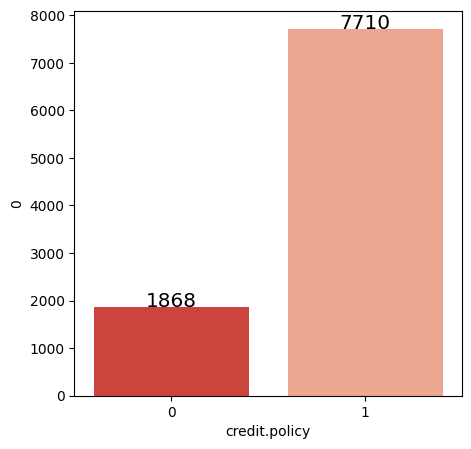

In [ ]:
plt.figure(figsize=(5,5))
target_group = data.groupby('credit.policy').size().reset_index()
pal = sns.color_palette("Reds", len(target_group))
rank = target_group["credit.policy"].argsort().argsort()
g = sns.barplot(x = target_group['credit.policy'],y = target_group[0],palette=np.array(pal[::-1])[rank] )

for index, row in target_group.iterrows():
    g.text(row['credit.policy'],row[0], round(row[0],2), color='black', ha="center",fontsize='x-large')

#**DROPPING COLUMNS/MISSING VALUES**


In [ ]:
print("No. of missing values: ")
for val in data.columns:
  print("\t%s: %d" % (val, data[val].isna().sum()))

No. of missing values: 
	credit.policy: 0
	purpose: 0
	int.rate: 0
	installment: 0
	log.annual.inc: 0
	dti: 0
	fico: 0
	days.with.cr.line: 0
	revol.bal: 0
	revol.util: 0
	inq.last.6mths: 0
	delinq.2yrs: 0
	pub.rec: 0
	not.fully.paid: 0


In [ ]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
data["days.with.cr.line"]

0        5639.958333
1        2760.000000
2        4710.000000
3        2699.958333
4        4066.000000
            ...     
9573    10474.000000
9574     4380.000000
9575     3450.041667
9576     1800.000000
9577     4740.000000
Name: days.with.cr.line, Length: 9578, dtype: float64

In [ ]:
drop_cols = ['purpose', 'inq.last.6mths', 'days.with.cr.line', 'log.annual.inc']
data = data.drop(drop_cols, axis = 1)

In [ ]:
data.head()

,credit.policy,int.rate,installment,dti,fico,revol.bal,revol.util,delinq.2yrs,pub.rec,not.fully.paid
0,1,0.1189,829.10,19.48,737,28854,52.1,0,0,0
1,1,0.1071,228.22,14.29,707,33623,76.7,0,0,0
2,1,0.1357,366.86,11.63,682,3511,25.6,0,0,0
3,1,0.1008,162.34,8.10,712,33667,73.2,0,0,0
4,1,0.1426,102.92,14.97,667,4740,39.5,1,0,0


#**DUPLICATED DATA**

In [ ]:
dup_data = data.duplicated()
print("No. of duplicated rows: %d" % (dup_data.sum()))

No. of duplicated rows: 2


In [ ]:
print('Duplicated rows before discarding = %d' % (data.shape[0]))
data = data.drop_duplicates()
print('Duplicated rows after discarding = %d' % (data.shape[0]))

Duplicated rows before discarding = 9578
Duplicated rows after discarding = 9576


#**USING SMOTE SAMPLING ALGORITHM (RF, SVM, DNN)**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Splitting data into: features (X) and target (y)
X = data.drop(columns=['credit.policy'])
y = data['credit.policy']

#Standardizing/Normalizing features
scler = StandardScaler() #method for standardizing features by removing the mean and scaling to unit variance.
X_scaled = scler.fit_transform(X) #standardize the features in the X df, fits the scler to the data (calculates mean and SD), then transforms the data using the calculated mean and standard deviation to achieve standardization

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
from imblearn.over_sampling import SMOTE

# Specify the desired ratio after resampling
# For example, if you want the minority class to have twice as many samples as the majority class:
desired_ratio = 0.5  # ratio of minority to majority class

# Initialize SMOTE with the desired ratio
smoteAlg = SMOTE(sampling_strategy=desired_ratio, random_state=42)

# Apply SMOTE to the training data to balance the classes
X_train_bal, y_train_bal = smoteAlg.fit_resample(X_train, y_train)


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

#^^^X_train, X_test, y_train, y_test contain the preprocessed data ready for training/testing

smoteAlg = SMOTE(random_state=42)
X_train_bal, y_train_bal = smoteAlg.fit_resample(X_train, y_train)

# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_train_bal, y_train_bal)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf)

pd.DataFrame(precision_recall)

Accuracy: 0.8590323703445876


,0,1,accuracy,macro avg,weighted avg
precision,0.650284,0.906143,0.859032,0.778213,0.855915
recall,0.609929,0.919879,0.859032,0.764904,0.859032
f1-score,0.629460,0.912959,0.859032,0.771210,0.857306
support,564.000000,2309.000000,0.859032,2873.000000,2873.000000


In [ ]:
import numpy as np

# Count the occurrences of each class in y_train_bal
class_counts = np.bincount(y_train_bal)

# Print the class distribution
for class_label, count in enumerate(class_counts):
    print(f"Class {class_label}: {count} samples")


Class 0: 5399 samples
Class 1: 5399 samples


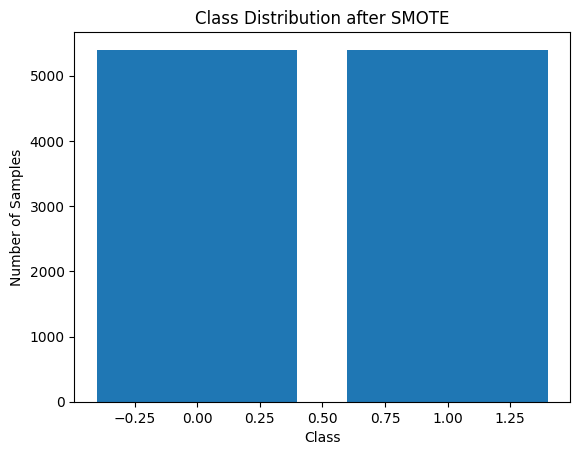

In [ ]:
import matplotlib.pyplot as plt

# Plot the class distribution
plt.bar(range(len(class_counts)), class_counts)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution after SMOTE')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

# How the confusion matrix matrix is calculated
conf_mat = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_mat)

# The confusion matrix prints like this:
# [True Positive (TP), False Negative (FN)]
# [False Positive (FP), True Negative (TN)]

Confusion Matrix:
[[ 344  220]
 [ 185 2124]]


In [ ]:
'''
from sklearn.impute import SimpleImputer
from sklearn.svm import LinearSVC


# Impute NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_test_imputed = imputer.fit_transform(X_test)
svm_classifier = LinearSVC(random_state=42)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test_imputed)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)
'''

'\nfrom sklearn.impute import SimpleImputer\nfrom sklearn.svm import LinearSVC\n\n\n# Impute NaN values with the mean of each column\nimputer = SimpleImputer(strategy=\'mean\')\nX_test_imputed = imputer.fit_transform(X_test)\nsvm_classifier = LinearSVC(random_state=42)\n\n# Make predictions on the testing set\ny_pred = svm_classifier.predict(X_test_imputed)\n\n# Evaluate the model\'s performance\naccuracy = accuracy_score(y_test, y_pred)\nreport = classification_report(y_test, y_pred)\n\nprint("Accuracy:", accuracy)\nprint("\nClassification Report:\n", report)\n'

In [ ]:
from sklearn.svm import LinearSVC

# Initialize the SVM classifier
svm_classifier = LinearSVC(random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_svm)
print("\nClassification Report:\n", report)

Accuracy: 0.8378002088409329

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.25      0.37       564
           1       0.84      0.98      0.91      2309

    accuracy                           0.84      2873
   macro avg       0.81      0.61      0.64      2873
weighted avg       0.83      0.84      0.80      2873



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
data.shape

(9576, 10)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


#Splitting data into: features (X) and target (y)
X = data.drop(columns=['credit.policy'])
y = data['credit.policy']

#Standardizing/Normalizing features
scler = StandardScaler() #method for standardizing features by removing the mean and scaling to unit variance.
X_scaled = scler.fit_transform(X) #standardize the features in the X df, fits the scler to the data (calculates mean and SD), then transforms the data using the calculated mean and standard deviation to achieve standardization


#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

smoteAlg = SMOTE(random_state=42)
X_train_bal, y_train_bal = smoteAlg.fit_resample(X_train, y_train)

X_val_bal, y_val_bal = smoteAlg.fit_resample(X_val, y_val)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(9,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
history = model.fit(X_train,y_train, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal))

# Evaluate the model on the test set
loss, accuracy_dnn = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)


Epoch 1/10
240/240 [==============================] - 2s 3ms/step - loss: 0.4335 - accuracy: 0.8121 - val_loss: 0.6827 - val_accuracy: 0.5940
Epoch 2/10
240/240 [==============================] - 1s 3ms/step - loss: 0.3743 - accuracy: 0.8478 - val_loss: 0.6647 - val_accuracy: 0.6299
Epoch 3/10
240/240 [==============================] - 1s 2ms/step - loss: 0.3550 - accuracy: 0.8581 - val_loss: 0.6334 - val_accuracy: 0.6965
Epoch 4/10
240/240 [==============================] - 1s 3ms/step - loss: 0.3425 - accuracy: 0.8649 - val_loss: 0.6280 - val_accuracy: 0.7056
Epoch 5/10
240/240 [==============================] - 1s 2ms/step - loss: 0.3348 - accuracy: 0.8709 - val_loss: 0.5924 - val_accuracy: 0.7245
Epoch 6/10
240/240 [==============================] - 1s 2ms/step - loss: 0.3280 - accuracy: 0.8713 - val_loss: 0.6270 - val_accuracy: 0.7121
Epoch 7/10
240/240 [==============================] - 1s 3ms/step - loss: 0.3233 - accuracy: 0.8742 - val_loss: 0.5870 - val_accuracy: 0.7213
Epoch 

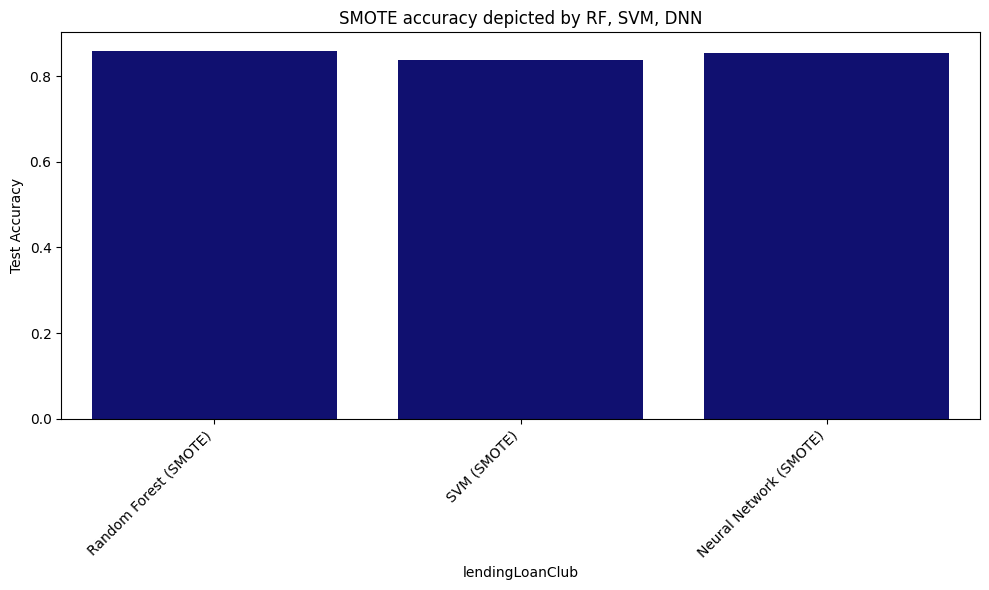

In [ ]:
test_accuracies = {
    'Random Forest (SMOTE)': accuracy_rf,
    'SVM (SMOTE)': accuracy_svm,
    'Neural Network (SMOTE)': accuracy_dnn,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color='navy')
plt.xticks(rotation=45, ha='right')
plt.title('SMOTE accuracy depicted by RF, SVM, DNN')
plt.xlabel('lendingLoanClub')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

#**USING ADASYN SAMPLING ALGORITHM (RF, SVM, DNN)**

In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target vector
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the class distribution after applying ADASYN
print("Class distribution before ADASYN:")
print(pd.Series(y_train).value_counts())

# Apply ADASYN to balance the training set
adasyn = ADASYN(random_state=42, sampling_strategy=1.0)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Check the class distribution after applying ADASYN
print("Class distribution after ADASYN:")
print(pd.Series(y_train_resampled).value_counts())

Class distribution before ADASYN:
1    6165
0    1495
Name: credit.policy, dtype: int64
Class distribution after ADASYN:
1    6165
0    5852
Name: credit.policy, dtype: int64


In [ ]:
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf_adasyn = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf_adasyn)

pd.DataFrame(precision_recall)

Accuracy: 0.8512526096033403


,0,1,accuracy,macro avg,weighted avg
precision,0.617021,0.908442,0.851253,0.762731,0.851709
recall,0.621984,0.906675,0.851253,0.764330,0.851253
f1-score,0.619493,0.907558,0.851253,0.763525,0.851478
support,373.000000,1543.000000,0.851253,1916.000000,1916.000000


In [ ]:
# Initialize the SVM classifier
svm_classifier = LinearSVC(random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm_adasyn = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_svm_adasyn)
print("\nClassification Report:\n", report)

Accuracy: 0.6967640918580376

Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.75      0.49       373
           1       0.92      0.68      0.78      1543

    accuracy                           0.70      1916
   macro avg       0.64      0.72      0.64      1916
weighted avg       0.81      0.70      0.73      1916



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


#Splitting data into: features (X) and target (y)
X = data.drop(columns=['credit.policy'])
y = data['credit.policy']

#Standardizing/Normalizing features
scler = StandardScaler() #method for standardizing features by removing the mean and scaling to unit variance.
X_scaled = scler.fit_transform(X) #standardize the features in the X df, fits the scler to the data (calculates mean and SD), then transforms the data using the calculated mean and standard deviation to achieve standardization


#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

adasyn = ADASYN(random_state=42, sampling_strategy=1.0)
X_train_bal, y_train_bal = adasyn.fit_resample(X_train, y_train)

X_val_bal, y_val_bal = adasyn.fit_resample(X_val, y_val)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(9,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
history = model.fit(X_train,y_train, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal))

# Evaluate the model on the test set
loss, accuracy_dnn_adasyn = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

Epoch 1/10
240/240 [==============================] - 3s 6ms/step - loss: 0.4303 - accuracy: 0.8178 - val_loss: 0.6981 - val_accuracy: 0.6110
Epoch 2/10
240/240 [==============================] - 1s 4ms/step - loss: 0.3685 - accuracy: 0.8450 - val_loss: 0.7672 - val_accuracy: 0.5920
Epoch 3/10
240/240 [==============================] - 1s 3ms/step - loss: 0.3520 - accuracy: 0.8552 - val_loss: 0.7878 - val_accuracy: 0.6129
Epoch 4/10
240/240 [==============================] - 1s 3ms/step - loss: 0.3418 - accuracy: 0.8620 - val_loss: 0.7092 - val_accuracy: 0.6553
Epoch 5/10
240/240 [==============================] - 1s 2ms/step - loss: 0.3339 - accuracy: 0.8683 - val_loss: 0.7075 - val_accuracy: 0.6635
Epoch 6/10
240/240 [==============================] - 1s 4ms/step - loss: 0.3288 - accuracy: 0.8684 - val_loss: 0.7569 - val_accuracy: 0.6540
Epoch 7/10
240/240 [==============================] - 1s 4ms/step - loss: 0.3254 - accuracy: 0.8701 - val_loss: 0.6875 - val_accuracy: 0.6774
Epoch 

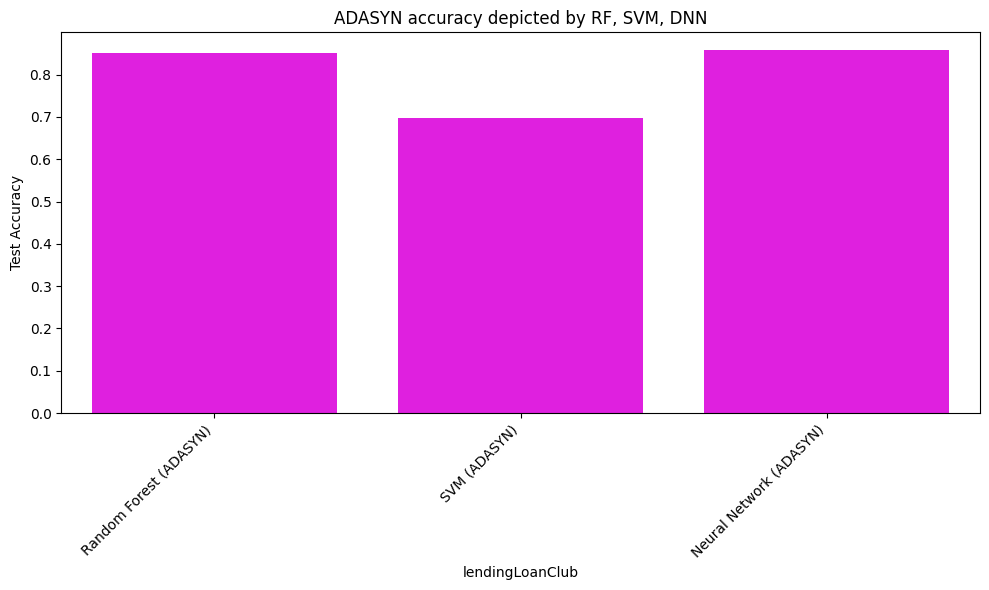

In [ ]:
test_accuracies = {
    'Random Forest (ADASYN)': accuracy_rf_adasyn,
    'SVM (ADASYN)': accuracy_svm_adasyn,
    'Neural Network (ADASYN)': accuracy_dnn_adasyn,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color='magenta')
plt.xticks(rotation=45, ha='right')
plt.title('ADASYN accuracy depicted by RF, SVM, DNN')
plt.xlabel('lendingLoanClub')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

#**USING RANDOM OVER SAMPLING ALGORITHM (RF, SVM, DNN)**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target vector
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("Class distribution after Random Oversampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after Random Oversampling:
1    6165
0    6165
Name: credit.policy, dtype: int64


In [ ]:
# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_resampled, y_resampled)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf_rof = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf_rof)

pd.DataFrame(precision_recall)

Accuracy: 0.8830897703549061


,0,1,accuracy,macro avg,weighted avg
precision,0.789916,0.896305,0.88309,0.843111,0.876204
recall,0.519337,0.967825,0.88309,0.743581,0.883090
f1-score,0.626667,0.930693,0.88309,0.778680,0.873252
support,181.000000,777.000000,0.88309,958.000000,958.000000


In [ ]:
# Initialize the SVM classifier
svm_classifier = LinearSVC(random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_resampled, y_resampled)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm_rof = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_svm_rof)
print("\nClassification Report:\n", report)

Accuracy: 0.7233820459290188

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.70      0.49       181
           1       0.91      0.73      0.81       777

    accuracy                           0.72       958
   macro avg       0.64      0.72      0.65       958
weighted avg       0.81      0.72      0.75       958



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


#Splitting data into: features (X) and target (y)
X = data.drop(columns=['credit.policy'])
y = data['credit.policy']

#Standardizing/Normalizing features
scler = StandardScaler() #method for standardizing features by removing the mean and scaling to unit variance.
X_scaled = scler.fit_transform(X) #standardize the features in the X df, fits the scler to the data (calculates mean and SD), then transforms the data using the calculated mean and standard deviation to achieve standardization


#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train, y_train)

X_val_bal, y_val_bal = ros.fit_resample(X_val, y_val)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(9,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
history = model.fit(X_train,y_train, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal))

# Evaluate the model on the test set
loss, accuracy_dnn_rof = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

Epoch 1/10
240/240 [==============================] - 2s 3ms/step - loss: 0.4191 - accuracy: 0.8217 - val_loss: 0.6622 - val_accuracy: 0.6815
Epoch 2/10
240/240 [==============================] - 1s 2ms/step - loss: 0.3679 - accuracy: 0.8458 - val_loss: 0.6257 - val_accuracy: 0.7030
Epoch 3/10
240/240 [==============================] - 1s 3ms/step - loss: 0.3533 - accuracy: 0.8533 - val_loss: 0.6144 - val_accuracy: 0.7239
Epoch 4/10
240/240 [==============================] - 1s 4ms/step - loss: 0.3424 - accuracy: 0.8615 - val_loss: 0.6531 - val_accuracy: 0.7121
Epoch 5/10
240/240 [==============================] - 1s 4ms/step - loss: 0.3352 - accuracy: 0.8637 - val_loss: 0.6306 - val_accuracy: 0.7200
Epoch 6/10
240/240 [==============================] - 1s 4ms/step - loss: 0.3298 - accuracy: 0.8679 - val_loss: 0.6311 - val_accuracy: 0.7272
Epoch 7/10
240/240 [==============================] - 1s 3ms/step - loss: 0.3239 - accuracy: 0.8726 - val_loss: 0.5982 - val_accuracy: 0.7343
Epoch 

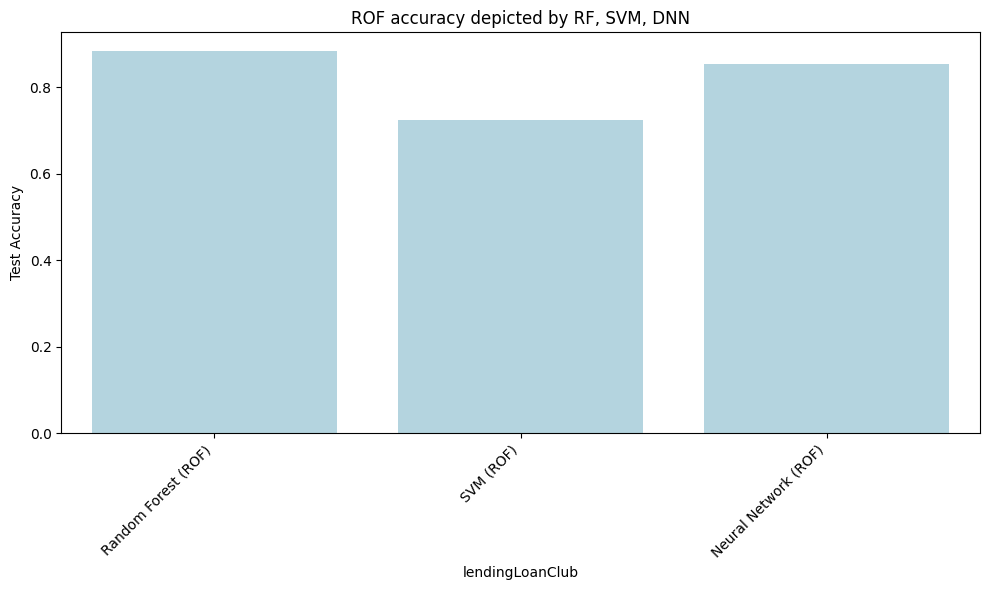

In [ ]:
test_accuracies = {
    'Random Forest (ROF)': accuracy_rf_rof,
    'SVM (ROF)': accuracy_svm_rof,
    'Neural Network (ROF)': accuracy_dnn_rof,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color='lightblue')
plt.xticks(rotation=45, ha='right')
plt.title('ROF accuracy depicted by RF, SVM, DNN')
plt.xlabel('lendingLoanClub')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

#**USING RANDOM UNDER SAMPLING ALGORITHM (RF, SVM, DNN)**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target vector
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("Class distribution after Random Oversampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after Random Oversampling:
0    1495
1    1495
Name: credit.policy, dtype: int64


In [ ]:
# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_resampled, y_resampled)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf_ruf = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf_ruf)

pd.DataFrame(precision_recall)

Accuracy: 0.7964509394572025


,0,1,accuracy,macro avg,weighted avg
precision,0.474638,0.926686,0.796451,0.700662,0.841278
recall,0.723757,0.813385,0.796451,0.768571,0.796451
f1-score,0.573304,0.866347,0.796451,0.719825,0.810981
support,181.000000,777.000000,0.796451,958.000000,958.000000


In [ ]:
# Initialize the SVM classifier
svm_classifier = LinearSVC(random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_resampled, y_resampled)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm_ruf = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_svm_ruf)
print("\nClassification Report:\n", report)

Accuracy: 0.7181628392484343

Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.70      0.48       181
           1       0.91      0.72      0.81       777

    accuracy                           0.72       958
   macro avg       0.64      0.71      0.65       958
weighted avg       0.81      0.72      0.75       958



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


#Splitting data into: features (X) and target (y)
X = data.drop(columns=['credit.policy'])
y = data['credit.policy']

#Standardizing/Normalizing features
scler = StandardScaler() #method for standardizing features by removing the mean and scaling to unit variance.
X_scaled = scler.fit_transform(X) #standardize the features in the X df, fits the scler to the data (calculates mean and SD), then transforms the data using the calculated mean and standard deviation to achieve standardization


#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

rus = RandomUnderSampler(random_state=42)
X_train_bal, y_train_bal = rus.fit_resample(X_train, y_train)

X_val_bal, y_val_bal = rus.fit_resample(X_val, y_val)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(9,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
history = model.fit(X_train,y_train, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal))

# Evaluate the model on the test set
loss, accuracy_dnn_ruf = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

Epoch 1/10
240/240 [==============================] - 2s 4ms/step - loss: 0.4180 - accuracy: 0.8253 - val_loss: 0.6435 - val_accuracy: 0.6562
Epoch 2/10
240/240 [==============================] - 1s 2ms/step - loss: 0.3722 - accuracy: 0.8416 - val_loss: 0.6260 - val_accuracy: 0.6797
Epoch 3/10
240/240 [==============================] - 1s 3ms/step - loss: 0.3579 - accuracy: 0.8546 - val_loss: 0.6503 - val_accuracy: 0.6875
Epoch 4/10
240/240 [==============================] - 1s 3ms/step - loss: 0.3449 - accuracy: 0.8595 - val_loss: 0.6265 - val_accuracy: 0.6953
Epoch 5/10
240/240 [==============================] - 1s 3ms/step - loss: 0.3382 - accuracy: 0.8675 - val_loss: 0.6249 - val_accuracy: 0.7031
Epoch 6/10
240/240 [==============================] - 1s 3ms/step - loss: 0.3297 - accuracy: 0.8705 - val_loss: 0.5929 - val_accuracy: 0.7214
Epoch 7/10
240/240 [==============================] - 1s 2ms/step - loss: 0.3246 - accuracy: 0.8706 - val_loss: 0.6320 - val_accuracy: 0.7005
Epoch 

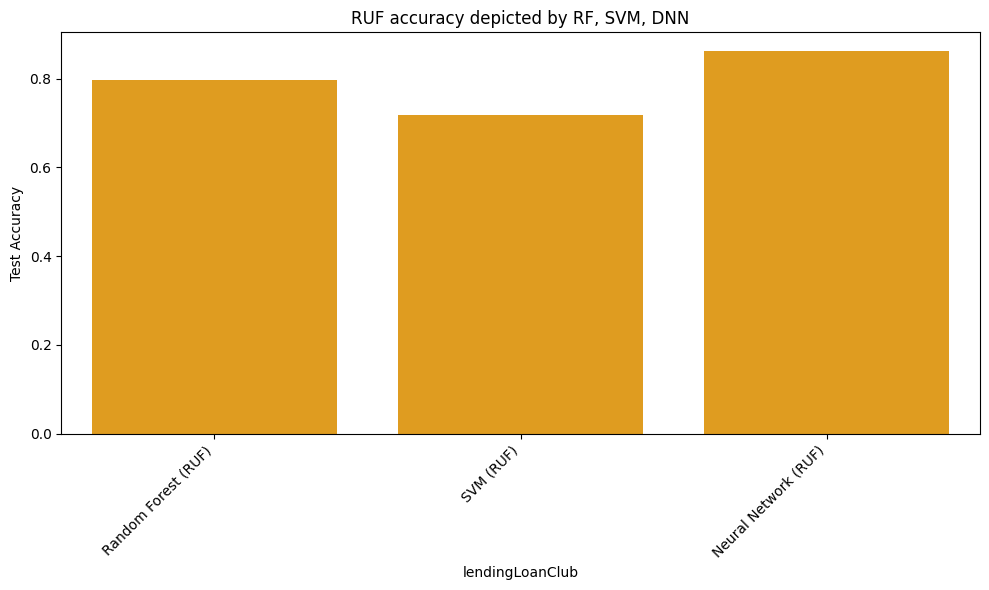

In [ ]:
test_accuracies = {
    'Random Forest (RUF)': accuracy_rf_ruf,
    'SVM (RUF)': accuracy_svm_ruf,
    'Neural Network (RUF)': accuracy_dnn_ruf,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color='orange')
plt.xticks(rotation=45, ha='right')
plt.title('RUF accuracy depicted by RF, SVM, DNN')
plt.xlabel('lendingLoanClub')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

#**USING GAMMA DISTRIBUTION (RF, SVM, DNN)**

In [ ]:
import numpy as np
from sklearn.utils import resample
from sklearn.utils import shuffle
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target vector

# Separate minority and majority classes
X_minority = X_scaled[y == 1]
X_majority = X_scaled[y == 0]

# Determine the size of the minority class
minority_size = len(X_minority)

# Define parameters for the Gamma distribution
shape = 2.0  # Shape parameter of the Gamma distribution
scale = 1.0  # Scale parameter of the Gamma distribution

# Generate random indices for sampling from the majority class
#gamma_indices = pd.random.gamma(shape, scale, size=minority_size).astype(int)

gamma_indices = np.round(np.random.gamma(shape, scale, size=minority_size)).astype(int)

# Sample from the majority class using the Gamma indices
#X_majority_sampled = X_majority.iloc[gamma_indices]
X_majority_sampled = X_majority[gamma_indices]

# Combine minority class samples with sampled majority class samples
X_resampled = np.concatenate([X_minority, X_majority_sampled])
y_resampled = np.concatenate([pd.Series(np.ones(minority_size)), pd.Series(np.zeros(minority_size))])

# Shuffle the resampled data
X_resampled, y_resampled = shuffle(X_resampled, y_resampled, random_state=42)

# Check the class distribution after resampling
print("Class distribution after Gamma distribution-based sampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after Gamma distribution-based sampling:
1.0    7708
0.0    7708
dtype: int64


In [ ]:
# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_resampled, y_resampled)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf_gamma = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf_gamma)

pd.DataFrame(precision_recall)

Accuracy: 0.8121085594989561


,0,1,accuracy,macro avg,weighted avg
precision,1.000000,0.811912,0.812109,0.905956,0.847449
recall,0.005525,1.000000,0.812109,0.502762,0.812109
f1-score,0.010989,0.896194,0.812109,0.453591,0.728947
support,181.000000,777.000000,0.812109,958.000000,958.000000


In [ ]:
# Initialize the SVM classifier
svm_classifier = LinearSVC(random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_resampled, y_resampled)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm_gamma = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_svm_gamma)
print("\nClassification Report:\n", report)

Accuracy: 0.824634655532359

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.18      0.28       181
           1       0.84      0.97      0.90       777

    accuracy                           0.82       958
   macro avg       0.73      0.58      0.59       958
weighted avg       0.80      0.82      0.78       958



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(9,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
history = model.fit(X_train,y_train, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal))

# Evaluate the model on the test set
loss, accuracy_dnn_gamma = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

Epoch 1/10
386/386 [==============================] - 3s 3ms/step - loss: 0.1071 - accuracy: 0.9643 - val_loss: 2.7075 - val_accuracy: 0.5625
Epoch 2/10
386/386 [==============================] - 1s 2ms/step - loss: 0.0215 - accuracy: 0.9942 - val_loss: 3.9622 - val_accuracy: 0.5417
Epoch 3/10
386/386 [==============================] - 1s 2ms/step - loss: 0.0133 - accuracy: 0.9973 - val_loss: 4.7274 - val_accuracy: 0.5495
Epoch 4/10
386/386 [==============================] - 1s 2ms/step - loss: 0.0112 - accuracy: 0.9974 - val_loss: 5.3565 - val_accuracy: 0.5521
Epoch 5/10
386/386 [==============================] - 1s 2ms/step - loss: 0.0088 - accuracy: 0.9984 - val_loss: 6.0680 - val_accuracy: 0.5339
Epoch 6/10
386/386 [==============================] - 1s 2ms/step - loss: 0.0074 - accuracy: 0.9985 - val_loss: 6.8283 - val_accuracy: 0.5339
Epoch 7/10
386/386 [==============================] - 1s 2ms/step - loss: 0.0068 - accuracy: 0.9986 - val_loss: 7.2333 - val_accuracy: 0.5339
Epoch 

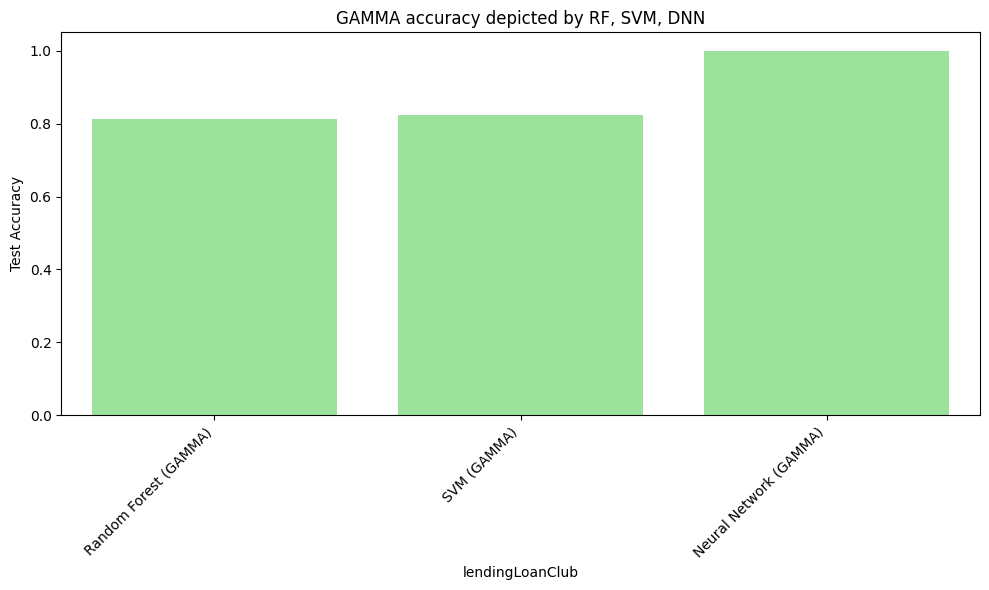

In [ ]:
test_accuracies = {
    'Random Forest (GAMMA)': accuracy_rf_gamma,
    'SVM (GAMMA)': accuracy_svm_gamma,
    'Neural Network (GAMMA)': accuracy_dnn_gamma,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color='lightgreen')
plt.xticks(rotation=45, ha='right')
plt.title('GAMMA accuracy depicted by RF, SVM, DNN')
plt.xlabel('lendingLoanClub')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

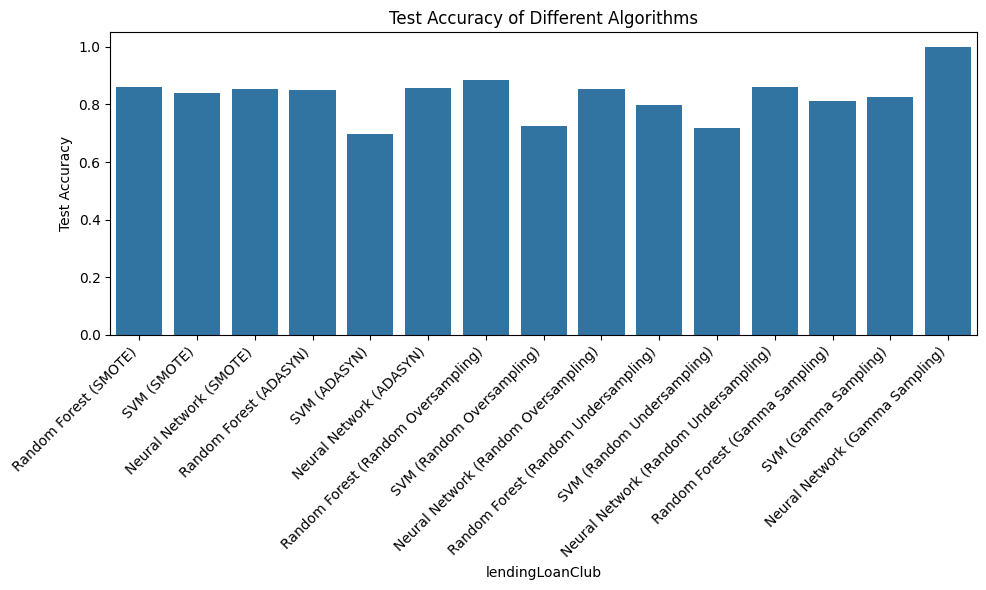

In [ ]:
# Store the test accuracies for each algorithm
# Adjusted dictionary to match your variables
test_accuracies = {
    'Random Forest (SMOTE)': accuracy_rf,
    'SVM (SMOTE)': accuracy_svm,
    'Neural Network (SMOTE)': accuracy_dnn,
    'Random Forest (ADASYN)': accuracy_rf_adasyn,
    'SVM (ADASYN)': accuracy_svm_adasyn,
    'Neural Network (ADASYN)': accuracy_dnn_adasyn,
    'Random Forest (Random Oversampling)': accuracy_rf_rof,
    'SVM (Random Oversampling)': accuracy_svm_rof,
    'Neural Network (Random Oversampling)': accuracy_dnn_rof,
    'Random Forest (Random Undersampling)': accuracy_rf_ruf,
    'SVM (Random Undersampling)': accuracy_svm_ruf,
    'Neural Network (Random Undersampling)': accuracy_dnn_ruf,
    'Random Forest (Gamma Sampling)': accuracy_rf_gamma,
    'SVM (Gamma Sampling)': accuracy_svm_gamma,
    'Neural Network (Gamma Sampling)': accuracy_dnn_gamma,
}


# Plotting the test accuracy for each algorithm
plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()))
plt.xticks(rotation=45, ha='right')
plt.title('Test Accuracy of Different Algorithms')
plt.xlabel('lendingLoanClub')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

#**END OF ANALYSIS**

In [ ]:
SMOTE_mean = (accuracy_svm + accuracy_rf + accuracy_dnn)/3 *100
print("SMOTE avg : ", SMOTE_mean)

adasyn_mean = (accuracy_svm_adasyn + accuracy_rf_adasyn + accuracy_dnn_adasyn)/3 *100
print("adasyn avg : ", adasyn_mean)

ros_mean = (accuracy_svm_rof + accuracy_rf_rof + accuracy_dnn_rof)/3 * 100
print("ros avg : ", ros_mean)

rus_mean = (accuracy_svm_ruf + accuracy_rf_ruf + accuracy_dnn_ruf)/3 * 100
print("rus avg : ", rus_mean)

gamma_mean = (accuracy_svm_gamma + accuracy_rf_gamma + accuracy_dnn_gamma)/3 * 100
print("gamma avg : ", gamma_mean)

SMOTE avg :  85.05795537796136
adasyn avg :  80.16701454326521
ros avg :  82.04592994790816
rus avg :  79.19276261711254
gamma avg :  87.89144050104383
